## Rational Interpolation
Fitting rational functions to points.

In [1]:
# load some packages
import matplotlib.pyplot as plt
import numpy as np

# config
X_MIN = 0
X_MAX = 1
N = 11
X = np.linspace(X_MIN, X_MAX, N)
Y = np.sin(2*np.pi * X)

#### Visualize
Plot the points we'll try to interpolate.

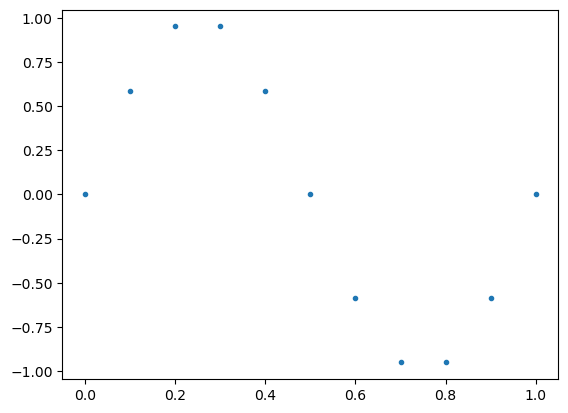

In [2]:
plt.plot(X, Y, '.')

#### Rational Interpolation
We implement the barycentric interpolation formula to find the rational interpolation. Therefore, our interpolation function is
$$
\frac{\sum \frac{y_j w_j}{x - x_j}}{\sum \frac{w_j}{x-x_j}}
$$
where we choose weights $w_j$ follow
$$
w_j = \begin{cases} (-1)^j \quad \text{if } j \in [1, N-1] \\ \frac{1}{2}(-1)^j \quad \text{otherwise} \end{cases}
$$
with $j$ starting at 0.

In [3]:
def get_rational_interpolation(x, y):
    '''
    Performs a rational interpolation using the barycentric interpolation
    formula

    Weights are chosen following H. E. Salzer (1972)
    '''
    # setup
    n = len(x)
    if (np.diff(x) < 0).any():  # we interpolate between neaby points, needs to be sorted
        idxs = np.argsort(x)
        x = x[idxs]
        y = y[idxs]
    assert (x[:-1] != x[1:]).all()

    # get weights
    W = (-1.)**np.arange(n)  # alternate +, -, +, -, +, ...
    W[[0, -1]] /= 2  # use 1/2 at the ends

    # make function and return
    def rational_interpolation(X):
        '''
        The function to find the rational interpolating the points at an X

        Note: This only works on sorted arrays
        '''
        # handle intial points
        bad_grid_idx, bad_pt_idx = np.where(X[:, None] == x)  # elements in the initial points break everything
        mask = np.ones_like(X, bool)
        mask[bad_grid_idx] = False
        
        # handle other points
        Y_num = np.sum((y * W) / (X[mask, None] - x), axis=1)  # numerator
        Y_den = np.sum(W / (X[mask, None] - x), axis=1)  # denominator
        Y = np.zeros_like(X)
        Y[bad_grid_idx] = y[bad_pt_idx]
        Y[mask] = Y_num / Y_den

        return Y

    return rational_interpolation

#### Interpolation Visualization
Connect the points using our interpolation. Importantly, our function returns a function for the interpolation, it doesn't interpolate itself.

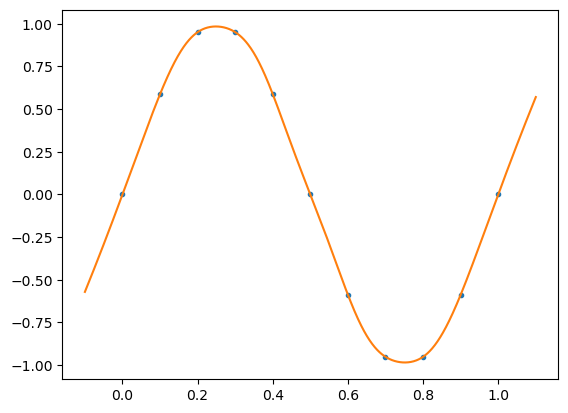

In [4]:
# grid we want to calculate values at
xrange = X_MAX - X_MIN
x_grid = np.linspace(X_MIN-xrange*0.1, X_MAX+xrange*0.1, 1001)

# plot it
plt.plot(X, Y, '.')
plt.plot(x_grid, get_rational_interpolation(X, Y)(x_grid))